Im Rahmen des Moduls "Maschinelles Lernen" wurde dieses Juypter Notebook von Lisa Tawackoli und Ruslan Adilgereev entwickelt. Der Programmentwurf nutzt den Datensatz "wbdc_5.csv", welcher Daten aus der Bildanalyse aus Feinnadelbiopsien bei Brusttumoren enthält. Ziel ist es, präzise Modelle zur Klassifizierung von Brusttumoren in die Kategorien gutartig (benigne) und bösartig (maligne) zu entwickeln.

Um dieses Ziel zu erreichen, werden verschiedene Machine-Learning Algorithmen eingesetzt, und in Bezug auf ihre Effektivität verglichen. Zu diesen Algorithmen gehören das Multilayer Perceptron (MLP), der Entscheidungsbaum (Decisiontree) und die Support Vector Machine (SVM). Es gilt zudem, die Lernergebnisse bezüglich der diskutierten Qualitätskriterien zu bewerten und die Modelle, sowie verschiedene Konfigurationen dieser, zur Optimierung des Ergebnisses vorzunehmen.

# Datapreprocessing

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, matthews_corrcoef


## Daten einlesen

In [25]:
data = pd.read_csv('wbdc_5.csv')  # Einlesen der Daten
data.head() # Ausgabe der ersten 5 Zeilen des Datensets

,ID,Diagnosis,radius1,texture1,perimeter1,area1,compactness1,concavity1,concave_points1,symmetry1,...,fractal_dimension2,radius3,texture3,perimeter3,area3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,897374,B,12.30,19.02,77.88,464.4,0.04202,0.007756,0.008535,0.1539,...,0.002222,13.35,28.46,84.53,544.3,0.09052,0.03619,0.03983,0.2554,0.07207
1,8910251,B,10.60,18.95,69.28,346.4,0.11470,0.063870,0.026420,0.1922,...,0.003318,11.88,22.94,78.28,424.8,0.25150,0.19160,0.07926,0.2940,0.07587
2,854941,B,13.03,18.42,82.61,523.8,0.03766,0.025620,0.029230,0.1467,...,0.001777,13.30,22.81,84.46,545.9,0.04619,0.04833,0.05013,0.1987,0.06169
3,89869,B,14.76,14.74,94.87,668.7,0.07780,0.046080,0.035280,0.1521,...,0.002783,17.27,17.93,114.20,880.8,0.20090,0.21510,0.12510,0.3109,0.08187
4,9113538,M,17.60,23.33,119.00,980.5,0.20040,0.213600,0.100200,0.1696,...,0.011300,21.57,28.87,143.60,1437.0,0.47850,0.51650,0.19960,0.2301,0.12240


Der Einblick in die ersten fünf Zeilen des Datensatzes verrät, dass er sich aus 29 Spalten zusammensetzt. Diese bestehen auf den ersten Blick, mit Ausnahme der ersten beiden Spalten "ID" und "Diagnosis", aus numerischen Daten. Da die Algorithmen numerische Daten benötigen, müssen kategorische Daten entsprechend umgewandelt werden.

## Datenexploration und -vorverarbeitung

### Explorative Datenanalyse

In [26]:
data.info()  # Ausgabe der Datentypen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  501 non-null    int64  
 1   Diagnosis           501 non-null    object 
 2   radius1             501 non-null    float64
 3   texture1            501 non-null    float64
 4   perimeter1          501 non-null    float64
 5   area1               501 non-null    float64
 6   compactness1        501 non-null    float64
 7   concavity1          501 non-null    float64
 8   concave_points1     501 non-null    float64
 9   symmetry1           501 non-null    float64
 10  fractal_dimension1  501 non-null    float64
 11  radius2             501 non-null    float64
 12  texture2            501 non-null    float64
 13  perimeter2          501 non-null    float64
 14  area2               501 non-null    float64
 15  compactness2        501 non-null    float64
 16  concavit

Diese Auskunft über den Datensatz vergewissert uns, dass er ausschließlich die zwei bereits genannten Spalten mit Daten kategorischer Art enthält. Der Count gibt uns außerdem Auskunft darüber, dass alle Felder des Datensatzes besetzt sind. Darauf basierend besteht die Annahme, dass es keine fehlenden Werte im Datensatz gibt. 

### Statistische Kennwerte

In [27]:
print(f"Dimension: {data.shape}")  # Ausgabe der Dimension des Datensatzes

Dimension: (501, 29)


Der Datensatz umfasst 501 Zeilen mit 29 Spalten.

In [28]:
data.describe()  # Ausgabe der statistischen Kennzahlen

,ID,radius1,texture1,perimeter1,area1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,fractal_dimension2,radius3,texture3,perimeter3,area3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,5.010000e+02,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,...,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,3.054487e+07,14.209036,19.198802,92.478323,661.344311,0.103989,0.088399,0.049339,0.181232,0.062651,...,0.003703,16.353329,25.561178,107.724671,887.457285,0.250233,0.268624,0.115245,0.289081,0.083408
std,1.266249e+08,3.510540,4.301340,24.154774,349.835088,0.051752,0.078738,0.038679,0.027541,0.007043,...,0.002466,4.789774,6.138863,33.187148,560.583121,0.148550,0.200673,0.065013,0.060569,0.017668
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.019380,0.000000,0.000000,0.106000,0.049960,...,0.000895,7.930000,12.020000,50.410000,185.200000,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.694760e+05,11.760000,16.150000,76.090000,427.300000,0.066300,0.029660,0.020540,0.162100,0.057680,...,0.002234,13.110000,20.980000,84.530000,523.400000,0.148200,0.114500,0.065280,0.248800,0.071470
50%,9.062900e+05,13.400000,18.800000,86.600000,553.500000,0.093620,0.061550,0.034000,0.178800,0.061400,...,0.003100,14.980000,25.230000,97.820000,688.600000,0.215600,0.228200,0.101200,0.281200,0.079870
75%,8.860702e+06,16.030000,21.680000,105.100000,797.800000,0.129900,0.127200,0.073640,0.195700,0.066000,...,0.004452,18.980000,29.430000,126.300000,1095.000000,0.337100,0.382900,0.160700,0.317900,0.091360
max,9.113205e+08,28.110000,39.280000,188.500000,2499.000000,0.345400,0.426800,0.201200,0.304000,0.097440,...,0.029840,33.130000,49.540000,229.300000,3432.000000,1.058000,1.252000,0.291000,0.663800,0.207500


Die deskriptive Statistik lässt vermuten, dass die Werte unterschiedlich skaliert sind. Während beispielsweise die Werte von "area1" im Bereich von Tausenden liegen, weisen "concavity1" oder "fractal dimension" Werte nahe Null auf. Eine Skalierung der Daten wäre daher im weiteren Vorgehen sinnvoll. 

Was bei näherer Betrachtung ebenfalls auffällt ist, dass ein Datensatz, der in der Variable "concavity1" den Wert 0 hat, ebenfalls einen Wert von 0 für die Variable "concave_points_1" hat. Da die beiden Variablen auch einen ähnlichen Namen habe besteht die Vermutung, dass diese Variablen möglicherweise dieselben Merkmale repräsentieren. Auch auffällig ist, dass die Variablen, die die "Concavity" repäsentieren auf den ersten Blick die einzigen, die teilweise 0 zum Wert haben. 

Dass ein Großteil der Variablen einen großen Sprung zwischen den Werten im 75%-Quartil und dem Maximalwert aufweist, deutet außerdem auf Ausreißer hin.


### Verteilung des Targets

Da die Zielvariable in unserem Fall kategorisch ist (bösartig bzw. gutartig), bietet sich das Barplot (Balkendiagramm) an, die Verteilung zu visualisieren.

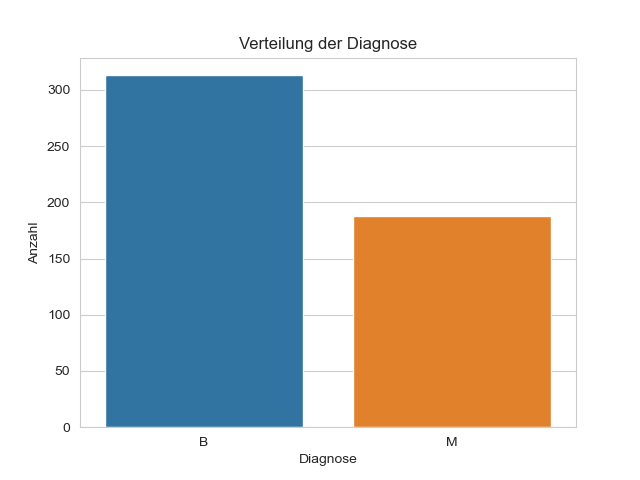

Anzahl an gutartigen Tumoren 313
Anzahl an bösartigen Tumoren 188


In [29]:
# Erstellen eines Barplots für die Zielvariabe (Diagnose)
sns.set_style("whitegrid")
sns.countplot(x='Diagnosis', data=data)
plt.title('Verteilung der Diagnose')
plt.xlabel('Diagnose')
plt.ylabel('Anzahl')
plt.show()

print(f'Anzahl an gutartigen Tumoren {data.where(data["Diagnosis"]=="B")["Diagnosis"].count()}')
print(f'Anzahl an bösartigen Tumoren {data.where(data["Diagnosis"]=="M")["Diagnosis"].count()}')

Das Balkendiagramm zeigt, dass es eine ungleiche Verteilung der Klassen "bösartig" und "gutartig" gibt. Genauer gibt es von den 501 Diagnosen 313, bei denen ein gutartiger Tumor diagnostiziert wurde und somit 188 Diagnosen von bösartigen Tumoren. Basierend auf diesem Ungleichgewicht könnten einige Modelle dazu neigen, die dominante Klasse besser zu klassifizieren. Es ist daher besonders wichtig, für die Bewertung Leistungsmetriken zu wählen, die das Ungleichgewicht berücksichtigen. Dazu gehören die Precision, der Recall oder der F1-Score. 

### Visualisierung eines Features

Für ein besseres Verständnis der Daten wurde eine Visualisierung umgesetzt

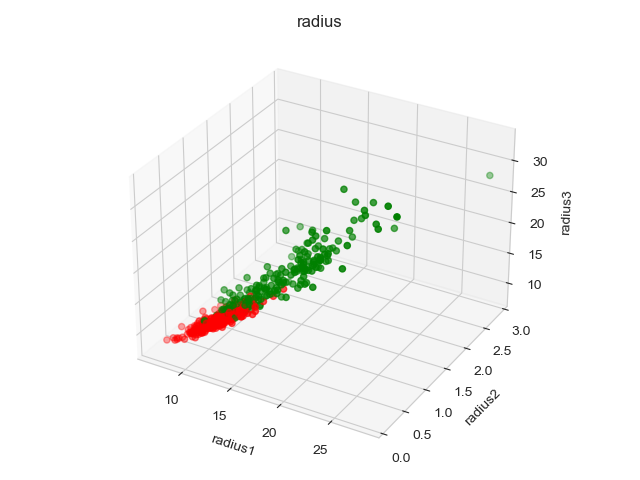

In [30]:
%matplotlib widget

colors = {'B': 'red', 'M': 'green'}
def plot_3d_feature(feature):
    '''
    Erstellt einen 3D-Scatterplot für ein bestimmtes Feature.    
    '''
    x = data[feature + "1"].to_numpy()
    y = data[feature + "2"].to_numpy()
    z = data[feature + "3"].to_numpy()

    # Erstellung der Figure und des 3D-Axes
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')

    
    # Erstellung des Scatterplots
    # Anpassen der Farbcodierung abhängig von der Diagnose
    ax.scatter(x, y, z, c=data['Diagnosis'].map(colors), marker='o')

    # Beschriftung der Achsen
    ax.set_xlabel(feature + "1")
    ax.set_ylabel(feature + "2")
    ax.set_zlabel(feature + "3")
    ax.set_title(feature)

    # Verbesserung der Anordnung und Anzeige des Plots
    plt.tight_layout()
    plt.show()

plot_3d_feature("radius")

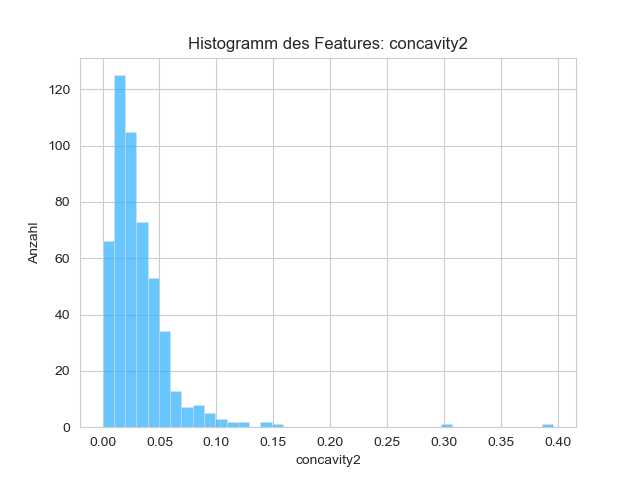

In [31]:
def plot_2d_feature(feature):
    if feature not in data.columns:
        print(f"Feature '{feature}' ist nicht im DataFrame vorhanden.")
        return
    # Aufteilen der Daten in Features und Labels
    # Markiere die jeweiligen Datenpunkte als gutartig (blau) oder bösartig (rot)
    
    # Erstelle eine Figur und ein Array von Achsen.
    plt.figure()
    plt.hist(data[feature], bins=40,  facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
    plt.title('Histogramm des Features: ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Anzahl')
    plt.show()
    
plot_2d_feature("concavity2")

Korellationsliste in absteigender Reihenfolge

Um kategorische Daten zu numerischen Daten umzuwandeln, wird das Label-Encoding angewandt. Diese Methode bietet sich insbesondere dadurch an, dass es nur zwei zu codierende Kategorien gibt ("B" und "M"), welche sich über 0 und 1 numerisch intuitiv darstellen lassen. Gegen die Alternative, das One-Hot Encoding, spricht, dass zwei separate Spalten und damit Redundanz erzeugt würden.

### Korellationsliste

In [34]:
# Map data Diagnosis to numerical values
data['Diagnosis'] = data['Diagnosis'].map({'B': 0, 'M': 1})


Die Features texture2, symmetry2 korellieren kaum. Wurde allerdings nicht aus dem Datensatz entfernt, da dies zu einem schlechteren Modell führt.


In [35]:
print(data.corr()['Diagnosis'].sort_values(ascending=False))

Diagnosis             1.000000
concave_points3       0.786233
perimeter3            0.783959
radius3               0.777392
concave_points1       0.769828
perimeter1            0.742306
area3                 0.740492
radius1               0.729682
area1                 0.712484
concavity1            0.686186
concavity3            0.648228
area2                 0.589750
radius2               0.588104
compactness1          0.582024
compactness3          0.577482
perimeter2            0.572819
texture3              0.453078
texture1              0.421488
concave_points2       0.403631
symmetry3             0.397381
symmetry1             0.314757
fractal_dimension3    0.298728
compactness2          0.295413
concavity2            0.239780
fractal_dimension2    0.089495
ID                    0.025297
texture2             -0.004977
symmetry2            -0.008573
fractal_dimension1   -0.025790
Name: Diagnosis, dtype: float64


# Datenbereinigung

Da fehlende Daten im Datensatz die Modellgenauigkeit reduzieren, zu Verzerrungen führen und die Komplexität der Datenverarbeitung erhöhen können, müssen diese im nächsten Schritt identifiziert und anschließend mithilfe geeigneter Methoden wie Imputation angepasst oder aus dem Datensatz entfernt werden (sofern der Anteil nicht zu groß ist). 

## Duplikate und fehlende Werte

In [11]:
print(f'Dimension des Datensets vor der Bereinigung {data.shape}')  # Ausgabe der Dimension des Datensatzes
data.dropna(axis=0)  # entfernen von Daten mit fehlenden Werten
data.drop_duplicates()  # entfernen von Duplikaten

# Spalten nach Namen entfernen

# data = data.drop(columns=['fractal_dimension1', 'symmetry2', 'texture2', 'fractal_dimension2'])

print(f'Dimension des Datensets nach der Bereinigung {data.shape}')  # Ausgabe der Dimension des Datensatzes
print(data['Diagnosis'].value_counts())  # Ausgabe der Anzahl der Klassen

Dimension des Datensets vor der Bereinigung (501, 29)
Dimension des Datensets nach der Bereinigung (501, 29)
Diagnosis
0    313
1    188
Name: count, dtype: int64



In unserem Datensatz haben wir festgestellt, dass Werte von 0 in den Spalten wie concavity nicht fehlerhaft sind, sondern tatsächlich valide Nullwerte repräsentieren, die auf das Fehlen von konkaven Einschnitten im Tumorgewebe hinweisen. Eine Imputation dieser Nullwerte oder deren Löschung würde zu einer Verzerrung der Ergebnisse führen, da solche Eingriffe fälschlicherweise die Charakteristika bösartiger Tumore einbringen könnten. Beispielsweise könnten imputierte Werte über 0 oder eine veränderte Verteilung durch Löschung der Nullwerte die Analyse beeinflussen. Eine Überprüfung dieser Annahme durch das Löschen von Zeilen mit einem concavity-Wert von 0 und anschließende Betrachtung der Datenverteilung ergab, dass Tumore mit concavity 0 durchweg gutartig waren. Daher haben wir beschlossen, keine Imputation oder Löschung dieser Nullwerte vorzunehmen, um die Integrität und Genauigkeit unserer Datenanalyse zu wahren.

## Ausreißer entfernen

Die statistischen Kennzahlen haben darauf gedeutet, dass es Ausreißer im Datensatz geben könnte, weshalb diese im nächsten Schritt entfernt werden. Dafür wurde die IQR Methode verwendet.

In [12]:
Q1 = data.iloc[:, 2:].quantile(0.25)
Q3 = data.iloc[:, 2:].quantile(0.75)
IQR = Q3 - Q1

# Finden der Zeilen ohne Ausreißer
mask = ~((data.iloc[:, 2:] < (Q1 - 1.5 * IQR)) | (data.iloc[:, 2:] > (Q3 + 1.5 * IQR))).any(axis=1)  # Erstellen einer Maske für die Zeilen ohne Ausreißer

# Filtern des gesamten DataFrame mit der erstellten Maske
data = data[mask]

print(data.shape)  # Überprüfung der neuen Dimension des DataFrame

(362, 29)


Nach der IQR Methode besteht unser Datensatz aus 362 Werten. Wie erwartet waren Ausreißer vorhanden.

## Skalierung der Daten

Die meisten Machine-Learning-Algorithmen reagieren empfindlich auf die Skalierung der Eingabedaten. Der Grund hierfür ist, dass sie Distanzmetriken nutzen, um die Ähnlichkeit zwischen Datenpunkten zu berechnen. Wenn Merkmale also in unterschiedlichen Maßstäben vorliegen, beeinträchtigt das möglicherweise die Modellleistung, und Merkmale mit größeren Wertebereichen werden stärker gewichtet. Da im Rahmen der explorativen Datenanalyse auffiel, dass unsere Features in unterschiedlichen Wertebereichen liegen, muss hier entsprechend gehandelt werden. Hierfür wird ein sogenanntes Feature-Scaling in Form einer Standardisierung vorgenommen. Diese bietet sich insbesondere dann an, wenn Daten unterschiedliche Einheiten haben, oder die Algorithmen, wie in unserem Fall SVM und neuronale Netze, emfpindlich gegenüber der Varianz in den Daten reagieren. 

Die Modelle werden sowohl mit MinMaxScaler, StandardScaler und auch unveränderte Daten getestet.

In [13]:
X = data.iloc[:, 2:].copy()  # Features sind alle Spalten außer der ersten und der letzten
y = data["Diagnosis"]  # Die Zielvariable ist die Spalte "Diagnosis"

# Min Max Skalierung
scaler = MinMaxScaler(feature_range=(0, 1))  # Erstellen des MinMaxScaler Objekts mit einem Wertebereich von 0 bis 1
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Daten standardisieren
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)



## Aufteilung in Test- und Traindaten

Das Aufteilen der Daten in Trainings- und Testsets dient dazu, das  Modell mit einem Datensatz zu trainieren und die Leistung unabhängig mit einem anderen Datensatz zu bewerten. So kann das Modell auf Overfitting getestet werden und die Übertragbarkeit auf neue Daten sichergestellt werden.
Eine geschichtete K-Faltungsaufteilung unterteilt den Datensatz in Test und Training und stellt sicher, dass die Verteilung der Beschriftungen in Test und Training ähnlich (nicht gleich) ist .

In [14]:
# Use KFold split

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Split data into train and test sets
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Unterteilung der unveränderten  Daten
    X_scaled_train, X_scaled_test = X_scaled_df.iloc[train_index], X_scaled_df.iloc[test_index]  # Unterteilung der skalierten Daten
    X_standardized_train, X_standardized_test = X_standardized_df.iloc[train_index], X_standardized_df.iloc[test_index]  # Unterteilung der standardisierten Daten
    
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Modelle

Nun können die Modelle mit den jeweiligen Train Datensets trainiert werden.

## Funktion zum trainieren

In [15]:
def train_model(model, X_train, X_test): 
    model.fit(X_train, y_train) 
    print("Beste Parameter:", model.best_params_)
    print("Beste Genauigkeit:", model.best_score_)
    best_model = model.best_estimator_
        
    # Vorhersagen auf dem Testdatensatz machen
    predictions = best_model.predict(X_test)
    
    # Berechnung des F1-Score (wähle den Durchschnittsmodus je nach Anwendungszweck)
    f1 = f1_score(y_test, predictions, average='macro')  # 'macro', 'micro', 'weighted'
    print("F1-Score (Macro):", f1)
    
    # Berechnung des Matthews Korrelationskoeffizienten
    mcc = matthews_corrcoef(y_test, predictions)
    print("Matthews Korrelationskoeffizient:", mcc)
    
    cm = confusion_matrix(y_test, predictions)
    print(f'Confusion Matrix\n {cm}')
    
    cr = classification_report(y_test, predictions)
    print(cr)
    return cm

## MLP

In [16]:
# Kombinationsmöglichkeiten der hyperparameter für das GridSearchCV
param_grid = {
    'max_iter' : [1000],
    'hidden_layer_sizes': [(10,10,10), (50,50), (100), (100,100), (20,50,20)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.1],  # Anfangs-Lernrate
}

# MLP Classifier
mlp = MLPClassifier(random_state=42)  # Erhöhung der Iteration für bessere Konvergenz
# Initialisieren des GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='f1', n_jobs=-1)

        
print("Original Data")
mlp_orig_cr = train_model(grid_search, X_train, X_test)
print("Standardized Data")
mlp_standard_cr = train_model(grid_search, X_standardized_train, X_standardized_test)
print("Scaled Data")
mlp_scaled_cr = train_model(grid_search, X_scaled_train, X_scaled_test)


Original Data
Beste Parameter: {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 1000, 'solver': 'adam'}
Beste Genauigkeit: 0.8807789782579697
F1-Score (Macro): 0.9229946524064171
Matthews Korrelationskoeffizient: 0.8486684247915055
Confusion Matrix
 [[53  1]
 [ 3 15]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        54
           1       0.94      0.83      0.88        18

    accuracy                           0.94        72
   macro avg       0.94      0.91      0.92        72
weighted avg       0.94      0.94      0.94        72

Standardized Data
Beste Parameter: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'max_iter': 1000, 'solver': 'sgd'}
Beste Genauigkeit: 0.9431884057971015
F1-Score (Macro): 0.9818135892902249
Matthews Korrelationskoeffizient: 0.96427

## SVC

In [17]:
# Parametergitter definieren
param_grid = {
    'C': [0.1, 1],  # Beispielwerte für C
    'kernel': ['rbf', 'sigmoid'],  # Verschiedene Kerne
    'gamma': ['scale', 'auto', 0.1],  # Gamma-Werte
    'degree': [2, 4]  # Grade für den polynomialen Kernel
}

# SVC initialisieren
svc = SVC(random_state=42)
# GridSearchCV einrichten
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

print("Original Data")
svc_orig_cr = train_model(grid_search, X_train, X_test)
print("Standardized Data")
svc_standard_cr = train_model(grid_search, X_standardized_train, X_standardized_test)
print("Scaled Data")
svc_scaled_cr = train_model(grid_search, X_scaled_train, X_scaled_test)

Original Data
Beste Parameter: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Beste Genauigkeit: 0.7539452495974235
F1-Score (Macro): 0.8972309449043676
Matthews Korrelationskoeffizient: 0.8130294884889123
Confusion Matrix
 [[54  0]
 [ 5 13]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        54
           1       1.00      0.72      0.84        18

    accuracy                           0.93        72
   macro avg       0.96      0.86      0.90        72
weighted avg       0.94      0.93      0.93        72

Standardized Data
Beste Parameter: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Beste Genauigkeit: 0.930049261083744
F1-Score (Macro): 0.9811271297509829
Matthews Korrelationskoeffizient: 0.9629500128629354
Confusion Matrix
 [[54  0]
 [ 1 17]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.94      0.97        18



## Decision Tree

In [18]:
# Decision Tree Classifier initialisieren
dt = DecisionTreeClassifier(random_state=42)

# Parametergitter definieren
param_grid = {
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

# GridSearchCV einrichten
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

dt_cr = train_model(grid_search, X_train, X_test)

Beste Parameter: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Beste Genauigkeit: 0.8714967247559017
F1-Score (Macro): 0.9017199017199018
Matthews Korrelationskoeffizient: 0.8095434662707596
Confusion Matrix
 [[53  1]
 [ 4 14]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        54
           1       0.93      0.78      0.85        18

    accuracy                           0.93        72
   macro avg       0.93      0.88      0.90        72
weighted avg       0.93      0.93      0.93        72

